<a href="https://colab.research.google.com/github/NgomGit/TB-prediction/blob/master/last_update_of_research_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this notebook I combined both datasets to train on it all my models and see how they are performing**

In [3]:
## initiating tensorflow and check GPU connection
import tensorflow as tf
tf.test.gpu_device_name()

''

In [5]:
tf.__version__

'2.2.0-rc3'

In [6]:
#Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [0]:
from glob import glob

# Mount the Drive files

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
/content/train/models

mkdir: cannot create directory ‘../../gdrive/models’: Operation not supported


In [0]:
mv models/* ../../gdrive

mv: cannot create regular file '../../gdrive/cnn_gen_model': Operation not supported
mv: cannot create regular file '../../gdrive/cnn_model_aug': Operation not supported
mv: cannot create regular file '../../gdrive/tb_cat_model_gen': Operation not supported


#Setup the data and directories

Show if the data is availble

In [0]:
ls

sample_data/


In [0]:
cd ..

/content


In [0]:
def resetAll():
  !rm -rf train
  !rm -rf MontgomerySet
  !rm -rf __MACOSX

In [0]:
#resetAll()

In [0]:
def setup_base_files():
  !unzip ChinaSet_AllFiles.zip 
  !unzip  NLM-MontgomeryCXRSet.zip 
  !mv ChinaSet_AllFiles train
  !mv MontgomerySet/CXR_png/* train/CXR_png

Download data

In [0]:
def download_data():
  !wget https://openi.nlm.nih.gov/imgs/collections/NLM-MontgomeryCXRSet.zip
  !wget  http://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip

In [0]:
download_data()

--2020-04-24 20:49:20--  https://openi.nlm.nih.gov/imgs/collections/NLM-MontgomeryCXRSet.zip
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.52.157, 2607:f220:41e:7052::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 616853875 (588M) [application/zip]
Saving to: ‘NLM-MontgomeryCXRSet.zip’

NLM-MontgomeryCXRSe 100%[===================>] 588.28M  40.7MB/s    in 16s     

2020-04-24 20:49:37 (36.7 MB/s) - ‘NLM-MontgomeryCXRSet.zip’ saved [616853875/616853875]

URL transformed to HTTPS due to an HSTS policy
--2020-04-24 20:49:40--  https://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.52.157, 2607:f220:41e:7052::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3770205534 (3.5G) [application/zip]
Saving to: ‘ChinaSet_AllFiles

Unzip the data 

In [0]:
setup_base_files()

Archive:  ChinaSet_AllFiles.zip
   creating: ChinaSet_AllFiles/ClinicalReadings/
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0001_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0002_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0003_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0004_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0005_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0006_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0007_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0008_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0009_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0010_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0011_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0012_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0013_0.txt  
 extracting: ChinaSet_AllFiles/Clin

In [0]:
rm -rf train_main/

In [0]:
## Unzip the zipped folder and store data in Train folder
#!unzip ChinaSet_AllFiles.zip 
#!unzip  NLM-MontgomeryCXRSet.zip 
#!mv ChinaSet_AllFiles train
#!mv MontgomerySet train
#!find train/CXR_png -size  0 -print0 |xargs -0 rm --

In [0]:
#setup_base_files()

In [0]:
!mv ChinaSet_AllFiles train

mv: rename ChinaSet_AllFiles to train/ChinaSet_AllFiles: No such file or directory


In [0]:
ls

ChinaSet_AllFiles.zip  MontgomerySet/            sample_data/
__MACOSX/              NLM-MontgomeryCXRSet.zip  train/


In [0]:
!unzip  NLM-MontgomeryCXRSet.zip

In [0]:
cd train

/content/train


Show the length of the data

In [0]:
ntb = glob('CXR_png/*_0.png')
tb = glob('CXR_png/*_1.png')

In [0]:
len (ntb)

406

In [0]:
len(tb)

394

create a directory called train_main and store data with TB and NonTB seperately in two folders.

In [0]:
!mkdir train_main
!mkdir train_main/ntb
!mkdir train_main/tb

In [0]:
files = ' '.join(ntb)

In [0]:
!mv $files train_main/ntb

In [0]:
files = ' '.join(tb)

In [0]:
!mv $files train_main/tb 

In [0]:
ntb_1 = glob('train_main/ntb/*.png')
tb_1 = glob('train_main/tb/*.png')

In [0]:
pwd

'/content/train'

In [102]:
len(ntb_1) 

406

In [103]:
len(tb_1) 

394

**splitting data into train and test with 20% test data** 

**splitting data into train and validation with 20% validation data** 

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
def split_into_train_val():
  
  #split into train and validation 
    ntb_train, ntb_val = train_test_split(ntb_1, 
                                        test_size=0.2,
                                        random_state =  np
                                         .random
                                         .randint(1,1000, 1)[0])
  
    tb_train, tb_val= train_test_split(tb_1,
                                      test_size=0.20,
                                      random_state =  np
                                         .random
                                         .randint(1,1000, 1)[0])

    return ntb_train,tb_train, ntb_val, tb_val

In [0]:
def split_into_train_val_test():
  #split into train and testing
  ntb_train, ntb_test = train_test_split(ntb_1, 
                                         test_size=0.20 ,
                                         random_state =  np
                                         .random
                                         .randint(1,1000, 1)[0])
                                         
                                    
  tb_train, tb_test = train_test_split(tb_1,
                                       test_size=0.20,
                                       random_state =  np
                                       .random
                                       .randint(1,1000, 1)[0])
                                        

  #split into train and validation 
  ntb_train, ntb_val = train_test_split(ntb_train, 
                                        test_size=0.1,
                                        random_state =  np
                                         .random
                                         .randint(1,1000, 1)[0])
  
  tb_train, tb_val = train_test_split(tb_train,
                                      test_size=0.10,
                                      random_state =  np
                                         .random
                                         .randint(1,1000, 1)[0])

  return ntb_train,tb_train, ntb_val, tb_val,ntb_test, tb_test

In [0]:
#ntb_train,tb_train, ntb_val, tb_val = split_into_train_val_test()


In [0]:
ntb_train,tb_train, ntb_val, tb_val, ntb_test, tb_test = split_into_train_val_test()

In [105]:
len(ntb_train) +len(tb_train)

574

In [106]:
len(ntb_val) + len(tb_val)

65

In [107]:
#output the size of the spliting data
a = len(ntb_train) + len(ntb_test) + len(ntb_val);a
b = len(tb_train) + len(tb_test) + len(tb_val);b

394

create new directories for test and validation

In [0]:
def reset_val_test_data():
    !mv val/ntb/* train_main/ntb
    !mv val/tb/* train_main/tb
    
    !mv test/ntb/* train_main/ntb
    !mv test/tb/* train_main/tb
    print("Move all files from val and test to train main")

In [0]:
def setup_directories(ntb_val,tb_val,ntb_test,tb_test):
    
    !rm -rf val test

    !mkdir val test
  #create directory for test and validation case whice doesn't have tb
  #create the directory for test and validation case which has tb 
    !mkdir  val/ntb val/tb

    files = ' '.join(ntb_val)
    !mv $files val/ntb  

    files = ' '.join(tb_val)
    !mv $files val/tb 
    
    !mkdir  test/ntb test/tb

    files = ' '.join(ntb_test)
    !mv $files test/ntb  

    files = ' '.join(tb_test)
    !mv $files test/tb 

In [95]:
reset_val_test_data()

mv: cannot stat 'val/ntb/*': No such file or directory
mv: cannot stat 'val/tb/*': No such file or directory
mv: cannot stat 'test/ntb/*': No such file or directory
mv: cannot stat 'test/tb/*': No such file or directory
Move all files from val and test to train main


In [0]:
cd val

/content/train/val


In [0]:
ls

ClinicalReadings/  models/                      test/        val/
CXR_png/           NLM-ChinaCXRSet-ReadMe.docx  train_main/


In [0]:
#setup_directories(ntb_val,tb_val)

In [0]:
setup_directories(ntb_val,tb_val,ntb_test,tb_test)

Create subdirectory test and validation

In [0]:
ls

ClinicalReadings/  NLM-ChinaCXRSet-ReadMe.docx  train_main/
CXR_png/           test/                        val/


# Once files are already setup we just need to run the following cells

In [0]:
#We already setup the foldet so we just have to load data from the folder
ntb_train = glob('train_main/ntb/*.png')
ntb_val = glob('val/ntb/*.png')
ntb_test = glob('test/ntb/*.png')

In [0]:
len(ntb_train) + len(ntb_val)+ len(ntb_test)

406

In [0]:
tb_train = glob('train_main/tb/*.png')
tb_val = glob('val/tb/*.png')
tb_test = glob('test/tb/*.png')

In [82]:
len(tb_train) + len(tb_val) + len(tb_test)

394

##Setup the environment defien the variables

In [0]:
WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

In [0]:
base_dir = 'train_main'
#train_dir ='train_dir'
val_dir = 'val'
test_dir = 'test'

In [0]:
train_path = base_dir
valid_path = val_dir
test_path = test_dir

num_train_samples = len(ntb_train)
num_val_samples = len(ntb_test)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

##Rescaling just the data

### Define a function for the data generation

In [0]:
def generate_data(classMode ='binary',doAug =False):
    datagen = trainAug = ImageDataGenerator(rescale=1.0/255)


    if doAug :
        trainAug = ImageDataGenerator(
            rescale=1/255.0,
            rotation_range=20,
            zoom_range=0.05,
            width_shift_range=0.05,
            height_shift_range=0.05,
            shear_range=0.05,
            vertical_flip=True,
            horizontal_flip=True,
            fill_mode="nearest")

# Keep
  
    train = trainAug.flow_from_directory(train_path,
                                        target_size=(HEIGHT,WIDTH),
                                        batch_size=train_batch_size,
                                        class_mode=classMode)

    val = trainAug.flow_from_directory(valid_path,
                                        target_size=(HEIGHT,WIDTH),
                                        batch_size=val_batch_size,
                                        class_mode=classMode)

  # Note: shuffle=False causes the test dataset to not be shuffled
    test = datagen.flow_from_directory(test_path,
                                        target_size=(HEIGHT,WIDTH),
                                        batch_size=val_batch_size,
                                        class_mode=classMode,
                                        shuffle=False)
    return train, val , test 

### Binary augmentation

#### Data  augmented

In [109]:
bin_train_aug , bin_val_aug, bin_test_aug = generate_data('binary',True)

Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


#### Data just rescaled

In [110]:
bin_train_res , bin_val_res, bin_test_res = generate_data('binary',False) 

Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


### categoorical data augmentation

#### Categorical data just rescaled

In [111]:
cat_train_res , cat_val_res, cat_test_res = generate_data('categorical',False)

Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


#### Categorical data augmented

In [112]:
cat_train_aug , cat_val_aug, cat_test_aug = generate_data('categorical',True)

Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


## Define parameters and functions for the training

In [0]:
# This function is defined to visualise loss and accuracy
def assess_performance(history):
    plt.figure(figsize=(15,3))
    # plot loss
    plt.subplot(121)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(122)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

### 10 folds implementation 

In [0]:
n_folds = 10
def k_folds(model, class_mode, do_aug ,n_folds=10):
    train_test_loss_acc = list()
    for _ in range(n_folds):
        # split data
        ntb_train,tb_train,ntb_val, tb_val,ntb_test, tb_test = split_into_train_val_test()
        # evaluate model
        reset_val_test_data()
        setup_directories(ntb_val,tb_val,ntb_test,tb_test)
        train_data, val_data, test_data =  generate_data(class_mode,do_aug)
        
        train_acc = model.evaluate_generator(train_data, steps=1, 
                                                  max_queue_size=10,
                                                  workers=1, 
                                                  use_multiprocessing=False, 
                                                  verbose=0)
        
        test_acc = model.evaluate_generator(test_data, steps=1, 
                                                  max_queue_size=10,
                                                  workers=1, 
                                                  use_multiprocessing=False, 
                                                  verbose=0)
        train_test_loss_acc.append([train_acc[1],test_acc[1]])
  
        #print("iteration ",_)
    
    print("Task finished")
    return train_test_loss_acc

In [0]:
def mean_train_test_acc(train_test_acc):
    train_acc = list()
    test_acc = list()
    
    for i in range(len(train_test_acc)):
        train_acc.append(train_test_acc[i][0])
        test_acc.append(train_test_acc[i][1])
        
    return  np.mean(train_acc) , np.mean(test_acc)

In [0]:
BatchSize = 32
xy_shape = 99
n_epochs = 20

In [0]:
steps_per_epoch = 5
validation_steps = 3

In [0]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


In [0]:
def tb_model(isCat = False):
    model = Sequential()
    model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (HEIGHT, WIDTH, 3)))
    model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
    model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = pool_size)) 
    model.add(Dropout(dropout_conv))

    model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
    model.add(MaxPooling2D(pool_size = pool_size))
    model.add(Dropout(dropout_conv))

    model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
    model.add(MaxPooling2D(pool_size = pool_size))
    model.add(Dropout(dropout_conv))

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(dropout_dense))

    if isCat :
        model.add(Dense(2, activation = "softmax"))
    else :
        model.add(Dense(1, activation = "sigmoid"))

    model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])
    
    return model

In [0]:
t_model = tb_model()

#### Tb model train with categorical data

In [0]:
t_model_cat = tb_model(True)

In [0]:
t_model_cat_aug = tb_model(True)

In [0]:
t_model_cat.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 297, 297, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 295, 295, 32)      9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 293, 293, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 146, 146, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 146, 146, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 144, 144, 64)      18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 142, 142, 64)     

In [0]:
history_tb_model_gen_cat = t_model_cat.fit(cat_train_res ,validation_data=cat_val_res,
                    steps_per_epoch=steps_per_epoch,
                    epochs=500, 
                    validation_steps=validation_steps,
                    verbose=1)

Epoch 1/500
5/5 [==============================] - 13s 3s/step - loss: 0.6852 - accuracy: 0.5800 - val_loss: 0.6635 - val_accuracy: 0.5000
Epoch 2/500
5/5 [==============================] - 5s 1s/step - loss: 0.7564 - accuracy: 0.4200 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/500
5/5 [==============================] - 10s 2s/step - loss: 0.6883 - accuracy: 0.6200 - val_loss: 0.6921 - val_accuracy: 0.6000
Epoch 4/500
5/5 [==============================] - 5s 957ms/step - loss: 0.6880 - accuracy: 0.5400 - val_loss: 0.6925 - val_accuracy: 0.5333
Epoch 5/500
5/5 [==============================] - 9s 2s/step - loss: 0.6945 - accuracy: 0.4800 - val_loss: 0.6933 - val_accuracy: 0.4000
Epoch 6/500
5/5 [==============================] - 7s 1s/step - loss: 0.6947 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.5667
Epoch 7/500
5/5 [==============================] - 7s 1s/step - loss: 0.6956 - accuracy: 0.4400 - val_loss: 0.6948 - val_accuracy: 0.4400
Epoch 8/500
5/5 [============

In [0]:
# Validate the model
t_model_cat.evaluate_generator(cat_train_res, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.0006312658661045134, 1.0]

In [0]:
# Validate the model
t_model_cat.evaluate_generator(cat_test_res, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[1.5340266227722168, 0.8999999761581421]

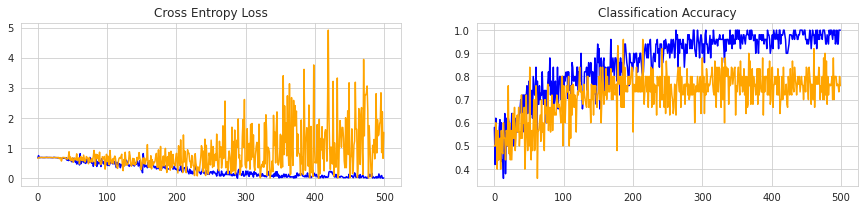

In [0]:
assess_performance(history_tb_model_gen_cat)

In [0]:
t_model_cat.save("tb_cat_model_gen")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


/content/train


### Data augmentation with categorical data

In [0]:
history_tb_model_aug_cat = t_model_cat_aug.fit(cat_train_aug ,validation_data=cat_val_aug,
                    steps_per_epoch=steps_per_epoch,
                    epochs=500, 
                    validation_steps=validation_steps,
                    verbose=1)

Epoch 1/500
5/5 [==============================] - 11s 2s/step - loss: 0.7317 - accuracy: 0.4800 - val_loss: 0.6885 - val_accuracy: 0.4333
Epoch 2/500
5/5 [==============================] - 8s 2s/step - loss: 0.6843 - accuracy: 0.5600 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/500
5/5 [==============================] - 11s 2s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6885 - val_accuracy: 0.5200
Epoch 4/500
5/5 [==============================] - 6s 1s/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.6000
Epoch 5/500
5/5 [==============================] - 10s 2s/step - loss: 0.6900 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 6/500
5/5 [==============================] - 8s 2s/step - loss: 0.6979 - accuracy: 0.4400 - val_loss: 0.6945 - val_accuracy: 0.4333
Epoch 7/500
5/5 [==============================] - 7s 1s/step - loss: 0.6843 - accuracy: 0.6818 - val_loss: 0.6944 - val_accuracy: 0.5200
Epoch 8/500
5/5 [==============

In [0]:
# Validate the model
t_model_cat_aug.evaluate_generator(cat_train_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.4699319005012512, 0.8999999761581421]

In [0]:
# Testing  the model
t_model_cat_aug.evaluate_generator(cat_test_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.23176658153533936, 1.0]

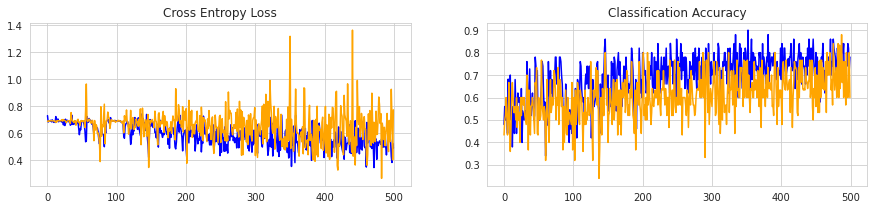

In [0]:
assess_performance(history_tb_model_aug_cat)

### applied 10-fold cross validation to see what will happen

In [0]:
train_test_acc = k_folds(t_model_cat_aug,'categorical',True)

Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging 

In [0]:
train_test_acc

[[0.8999999761581421, 1.0],
 [0.6000000238418579, 1.0],
 [0.800000011920929, 1.0],
 [0.800000011920929, 0.800000011920929],
 [0.800000011920929, 0.8999999761581421],
 [0.6000000238418579, 0.8999999761581421],
 [0.8999999761581421, 1.0],
 [0.8999999761581421, 1.0],
 [0.800000011920929, 0.8999999761581421],
 [1.0, 1.0]]

In [0]:
mean_train_test_acc(train_test_acc)

(0.899999988079071, 0.949999988079071)

#### TB model train with binary data 

In [0]:
#show the summary
t_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 295, 295, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 293, 293, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 146, 146, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 146, 146, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 144, 144, 64)      18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 142, 142, 64)     

### Train the model without augmentation

### Tb Model train without data Augmentation

In [0]:
history_tb_model_gen = t_model.fit(train_gen, validation_data=val_gen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=300, 
                    validation_steps=validation_steps,
                    verbose=1)

Epoch 1/300
5/5 [==============================] - 6s 1s/step - loss: 0.7468 - accuracy: 0.5400 - val_loss: 0.6973 - val_accuracy: 0.4667
Epoch 2/300
5/5 [==============================] - 6s 1s/step - loss: 0.6941 - accuracy: 0.5800 - val_loss: 0.6944 - val_accuracy: 0.5333
Epoch 3/300
5/5 [==============================] - 5s 916ms/step - loss: 0.7226 - accuracy: 0.4600 - val_loss: 0.6963 - val_accuracy: 0.5333
Epoch 4/300
5/5 [==============================] - 5s 1s/step - loss: 0.7002 - accuracy: 0.4400 - val_loss: 0.6931 - val_accuracy: 0.4231
Epoch 5/300
5/5 [==============================] - 4s 798ms/step - loss: 0.6915 - accuracy: 0.5476 - val_loss: 0.6925 - val_accuracy: 0.4333
Epoch 6/300
5/5 [==============================] - 6s 1s/step - loss: 0.6914 - accuracy: 0.6000 - val_loss: 0.6923 - val_accuracy: 0.4000
Epoch 7/300
5/5 [==============================] - 5s 923ms/step - loss: 0.6905 - accuracy: 0.5600 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 8/300
5/5 [========

In [0]:
# Validate the model
t_model.evaluate_generator(val_gen, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[2.6568570137023926, 0.699999988079071]

In [0]:
# testing the model
t_model.evaluate_generator(test_gen, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[2.350587844848633, 0.800000011920929]

### plot the history 

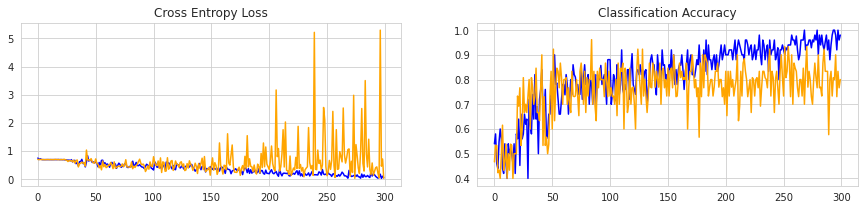

In [0]:
assess_performance(history_tb_model_gen)

### Train the model with augmentation data

In [0]:
tbModel_history_aug = t_model.fit(train_aug, validation_data=val_aug,
                    steps_per_epoch=steps_per_epoch,
                    epochs=300, 
                    validation_steps=validation_steps,
                    verbose=1)

Epoch 1/300
5/5 [==============================] - 21s 4s/step - loss: 1.5722 - accuracy: 0.6716 - val_loss: 0.6239 - val_accuracy: 0.6354
Epoch 2/300
5/5 [==============================] - 25s 5s/step - loss: 0.6066 - accuracy: 0.6938 - val_loss: 0.5570 - val_accuracy: 0.6757
Epoch 3/300
5/5 [==============================] - 16s 3s/step - loss: 0.6128 - accuracy: 0.6938 - val_loss: 0.6077 - val_accuracy: 0.7162
Epoch 4/300
5/5 [==============================] - 16s 3s/step - loss: 0.5388 - accuracy: 0.7125 - val_loss: 0.7188 - val_accuracy: 0.6351
Epoch 5/300
5/5 [==============================] - 19s 4s/step - loss: 0.5842 - accuracy: 0.6940 - val_loss: 0.5513 - val_accuracy: 0.7292
Epoch 6/300
5/5 [==============================] - 25s 5s/step - loss: 0.5468 - accuracy: 0.7437 - val_loss: 0.5402 - val_accuracy: 0.7297
Epoch 7/300
5/5 [==============================] - 14s 3s/step - loss: 0.4868 - accuracy: 0.7463 - val_loss: 0.5705 - val_accuracy: 0.7162
Epoch 8/300
5/5 [==========

In [0]:
# Validate the model
t_model.evaluate_generator(train_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.5073261260986328, 0.8125]

In [0]:
# Validate the model
t_model.evaluate_generator(test_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.4758850634098053, 0.71875]

sample_data/


### Define a simple model 

In [0]:
# define cnn model
def simple_cnn_model():
    model = Sequential()
    # 1 ConvLayer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(MaxPooling2D((2, 2)))
    # Flatten and Dense layers
    model.add(Flatten())
    # Add a Dense (Fully Connected) layer with 128 neurons with 'relu' activation with a kernel_initializer='he_uniform'
    # Add a Dense (Fully Connected) layer with 128 neurons with 'relu' activation with a kernel_initializer='he_uniform'
    model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
    # Add a Dense output layer with 1 neurons with 'sigmoid' activation
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
simple_cnn = simple_cnn_model()

In [0]:
simple_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 299, 299, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 710432)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               90935424  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 90,936,449
Trainable params: 90,936,449
Non-trainable params: 0
_________________________________________________________________


### Train without augmentation

In [0]:
simple_cnn_hist_gen = simple_cnn.fit(train_gen ,validation_data=val_gen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=500, 
                    validation_steps=validation_steps,
                    verbose=1)

Epoch 1/500
5/5 [==============================] - 6s 1s/step - loss: 270.3640 - accuracy: 0.4600 - val_loss: 310.0821 - val_accuracy: 0.4000
Epoch 2/500
5/5 [==============================] - 6s 1s/step - loss: 206.1744 - accuracy: 0.4800 - val_loss: 80.2816 - val_accuracy: 0.4333
Epoch 3/500
5/5 [==============================] - 4s 881ms/step - loss: 110.3164 - accuracy: 0.5400 - val_loss: 110.7895 - val_accuracy: 0.5000
Epoch 4/500
5/5 [==============================] - 5s 1s/step - loss: 61.6826 - accuracy: 0.5000 - val_loss: 57.2843 - val_accuracy: 0.5385
Epoch 5/500
5/5 [==============================] - 5s 984ms/step - loss: 46.2696 - accuracy: 0.4600 - val_loss: 25.9647 - val_accuracy: 0.6333
Epoch 6/500
5/5 [==============================] - 6s 1s/step - loss: 30.3378 - accuracy: 0.4600 - val_loss: 9.6923 - val_accuracy: 0.6000
Epoch 7/500
5/5 [==============================] - 4s 774ms/step - loss: 16.4242 - accuracy: 0.4524 - val_loss: 2.7396 - val_accuracy: 0.7333
Epoch 8/

KeyboardInterrupt: ignored

In [0]:
simple_cnn_hist = simple_cnn.history

In [0]:
simple_cnn.evaluate_generator(train_gen, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)


[0.0028979771304875612, 1.0]

In [0]:
# Validate the model
simple_cnn.evaluate_generator(test_gen, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[1.5580618381500244, 0.800000011920929]

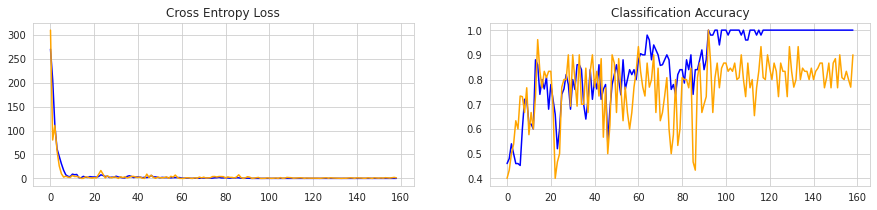

In [0]:
assess_performance(simple_cnn_hist)

### Train with augmentation

In [0]:
history_2 = simple_cnn.fit(train_aug, validation_data=val_aug,
                    steps_per_epoch=steps_per_epoch,
                    epochs=300, 
                    validation_steps=validation_steps,
                    verbose=1)

NameError: ignored

In [0]:
# Validate the model
simple_cnn.evaluate_generator(train_gen, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

In [0]:
# Validate the model
simple_cnn.evaluate_generator(test_gen, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

In [0]:
assess_performance(history_2)

## Define the main cnn model

In [0]:
# define cnn model
def cnn_model():
    model = Sequential()
    # 3 ConvLayer
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Dropout(dropout_conv))
    model.add(MaxPooling2D((2, 2)))
              
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Dropout(dropout_conv))
    model.add(MaxPooling2D((3,3)))
    # Flatten and Dense layers
    model.add(Flatten())
    # Add a Dense (Fully Connected) layer with 128 neurons with 'relu' activation with a kernel_initializer='he_uniform'
    # Add a Dense (Fully Connected) layer with 128 neurons with 'relu' activation with a kernel_initializer='he_uniform'
    model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
    # Add a Dense output layer with 1 neurons with 'sigmoid' activation
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
cnn = cnn_model()

In [0]:
cnn_aug = cnn_model()

In [0]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 299, 299, 19)      532       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 299, 299, 19)      3268      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 299, 299, 19)      3268      
_________________________________________________________________
dropout_13 (Dropout)         (None, 299, 299, 19)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 19)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 149, 149, 19)      3268      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 149, 149, 19)     

### Train without augmentation

In [0]:
hist_cnn_res = cnn.fit(bin_train_res, validation_data=bin_val_res,
                    steps_per_epoch=steps_per_epoch,
                    epochs=500, 
                    validation_steps=validation_steps,
                    verbose=1)

Epoch 1/500
5/5 [==============================] - 10s 2s/step - loss: 11.9299 - accuracy: 0.3800 - val_loss: 0.6308 - val_accuracy: 0.5333
Epoch 2/500
5/5 [==============================] - 7s 1s/step - loss: 0.7358 - accuracy: 0.6400 - val_loss: 0.9187 - val_accuracy: 0.4667
Epoch 3/500
5/5 [==============================] - 9s 2s/step - loss: 1.0188 - accuracy: 0.5800 - val_loss: 0.7466 - val_accuracy: 0.5200
Epoch 4/500
5/5 [==============================] - 5s 1s/step - loss: 0.7759 - accuracy: 0.5000 - val_loss: 0.6452 - val_accuracy: 0.5333
Epoch 5/500
5/5 [==============================] - 8s 2s/step - loss: 0.6068 - accuracy: 0.6200 - val_loss: 0.6174 - val_accuracy: 0.6400
Epoch 6/500
5/5 [==============================] - 6s 1s/step - loss: 0.6179 - accuracy: 0.5600 - val_loss: 0.6625 - val_accuracy: 0.5667
Epoch 7/500
5/5 [==============================] - 7s 1s/step - loss: 0.6842 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.8000
Epoch 8/500
5/5 [===============

In [0]:
    # Validate the model
cnn.evaluate_generator(bin_train_res, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.001647073426283896, 1.0]

In [0]:
# Testing the model
cnn.evaluate_generator(bin_test_res, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.06960760802030563, 1.0]

In [0]:
k_folds(cnn,'binary',False)

Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging 

[[0.8999999761581421, 0.8999999761581421],
 [0.8999999761581421, 0.8999999761581421],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.8999999761581421, 1.0],
 [1.0, 1.0],
 [0.8999999761581421, 0.8999999761581421],
 [0.8999999761581421, 0.8999999761581421],
 [0.699999988079071, 1.0],
 [0.800000011920929, 0.8999999761581421]]

In [0]:
train_test_acc =[[0.8999999761581421, 0.8999999761581421],
 [0.8999999761581421, 0.8999999761581421],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.8999999761581421, 1.0],
 [1.0, 1.0],
 [0.8999999761581421, 0.8999999761581421],
 [0.8999999761581421, 0.8999999761581421],
 [0.699999988079071, 1.0],
 [0.800000011920929, 0.8999999761581421]]

In [0]:
mean_train_test_acc(train_test_acc)

(0.899999988079071, 0.949999988079071)

In [0]:
cnn.save("models/cnn_gen_model")

#### Plot the loss and accuracy

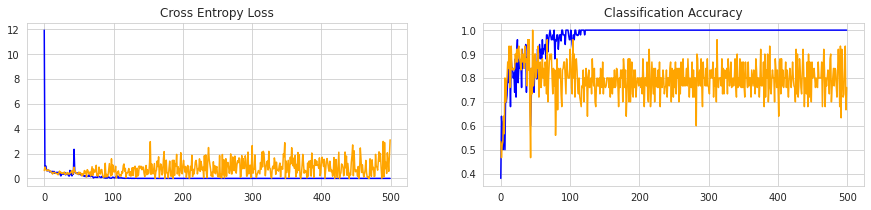

In [0]:
assess_performance(hist_cnn_res)

ClinicalReadings/  models/                      test/        val/
CXR_png/           NLM-ChinaCXRSet-ReadMe.docx  train_main/


### Train the model with data augmentation

In [0]:
cnn_hist_aug = cnn_aug.fit(bin_train_aug, validation_data=bin_val_aug,
                    steps_per_epoch=steps_per_epoch,
                    epochs=500, 
                    validation_steps=validation_steps,
                    verbose=1)

Epoch 1/500


FileNotFoundError: ignored

In [0]:
ls

ClinicalReadings/  NLM-ChinaCXRSet-ReadMe.docx  test/        val/
CXR_png/           tb_cat_model_gen             train_main/


In [0]:
# validate the model
cnn_aug.evaluate_generator(bin_train_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.9808185696601868, 0.5]

In [0]:
# testing the model
cnn_aug.evaluate_generator(bin_test_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.11546628177165985, 1.0]

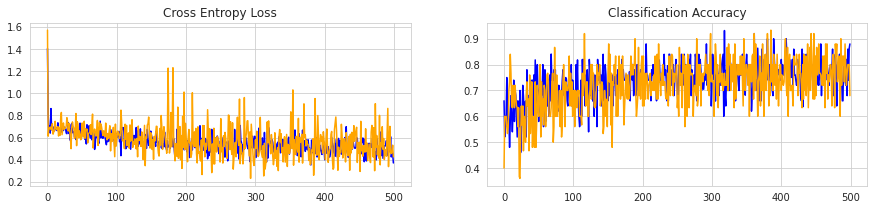

In [0]:
assess_performance(cnn_hist_aug)

### Save the model and applied k-fold cross validation

In [0]:
cnn_aug.save("cnn_model_aug")

In [0]:
k_folds(cnn,'binary',True)

Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Move all files from val and test to train main
Found 574 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 161 images belonging 

[[0.8999999761581421, 0.30000001192092896],
 [0.800000011920929, 0.5],
 [0.8999999761581421, 0.20000000298023224],
 [1.0, 0.20000000298023224],
 [0.800000011920929, 0.0],
 [0.800000011920929, 0.30000001192092896],
 [0.6000000238418579, 0.4000000059604645],
 [0.699999988079071, 0.4000000059604645],
 [0.6000000238418579, 0.20000000298023224],
 [0.800000011920929, 0.30000001192092896]]

In [0]:
t = [[0.8999999761581421, 0.30000001192092896],
 [0.800000011920929, 0.5],
 [0.8999999761581421, 0.20000000298023224],
 [1.0, 0.20000000298023224],
 [0.800000011920929, 0.0],
 [0.800000011920929, 0.30000001192092896],
 [0.6000000238418579, 0.4000000059604645],
 [0.699999988079071, 0.4000000059604645],
 [0.6000000238418579, 0.20000000298023224],
 [0.800000011920929, 0.30000001192092896]]

In [0]:
mean_train_test_acc(t)

(0.7900000035762786, 0.28000000566244126)

### Define a VGG model

In [0]:
from keras import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50, preprocess_input

In [0]:
# define vgg model
xy_shape3 = 224
BatchSize3 = 64
def deep_vgg_model():
    model = VGG16(include_top=False, input_shape=(WIDTH, HEIGHT, 3))
    # mark loaded layers as not trainable
    nb_layers = len(model.layers)
    print('nb_layers:',nb_layers)
    for layer in model.layers: #[:nb_layers-5]:  #model.layers[1:20]
        layer.trainable=False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
vgg_model_res = deep_vgg_model()

58892288/58889256 [==============================] - 2s 0us/step
nb_layers: 19


### VGG trained without data augmentation

In [0]:
history_vgg_res = vgg_model_res.fit_generator(
    bin_train_res,
    epochs=500,
    steps_per_epoch=steps_per_epoch,
    validation_data=bin_val_res,
    validation_steps=validation_steps)

Epoch 1/500
5/5 [==============================] - 12s 2s/step - loss: 4.8534 - accuracy: 0.5227 - val_loss: 0.7788 - val_accuracy: 0.5667
Epoch 2/500
5/5 [==============================] - 5s 1s/step - loss: 1.0178 - accuracy: 0.5600 - val_loss: 0.6472 - val_accuracy: 0.5667
Epoch 3/500
5/5 [==============================] - 10s 2s/step - loss: 0.7017 - accuracy: 0.4800 - val_loss: 0.7376 - val_accuracy: 0.5200
Epoch 4/500
5/5 [==============================] - 6s 1s/step - loss: 0.5930 - accuracy: 0.6800 - val_loss: 0.6614 - val_accuracy: 0.5667
Epoch 5/500
5/5 [==============================] - 8s 2s/step - loss: 0.7129 - accuracy: 0.5200 - val_loss: 0.6364 - val_accuracy: 0.5600
Epoch 6/500
5/5 [==============================] - 7s 1s/step - loss: 0.6361 - accuracy: 0.6800 - val_loss: 0.5599 - val_accuracy: 0.7667
Epoch 7/500
5/5 [==============================] - 8s 2s/step - loss: 0.6069 - accuracy: 0.7800 - val_loss: 0.6202 - val_accuracy: 0.6800
Epoch 8/500
5/5 [===============

Create filters

In [0]:
# Validate the model
vgg_model.evaluate_generator(bin_train_res, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

NameError: ignored

In [0]:
# Validate the model
vgg_model.evaluate_generator(bin_test_res, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.7238829135894775, 0.8999999761581421]

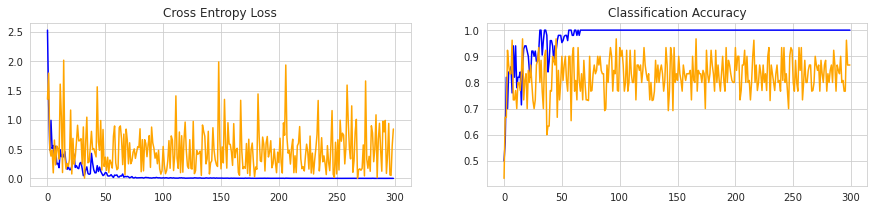

In [0]:
assess_performance(history_vgg_gen)

### VGG train with data augmentation

In [0]:
history_vgg_aug = vgg_model.fit_generator(
    train_aug,
    epochs=300,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_aug,
    validation_steps=validation_steps)

Epoch 1/300
5/5 [==============================] - 22s 4s/step - loss: 2.4571 - accuracy: 0.6250 - val_loss: 2.2373 - val_accuracy: 0.5729
Epoch 2/300
5/5 [==============================] - 25s 5s/step - loss: 1.0652 - accuracy: 0.7250 - val_loss: 1.1915 - val_accuracy: 0.5405
Epoch 3/300
5/5 [==============================] - 14s 3s/step - loss: 0.6724 - accuracy: 0.7239 - val_loss: 0.5860 - val_accuracy: 0.8108
Epoch 4/300
5/5 [==============================] - 17s 3s/step - loss: 0.5429 - accuracy: 0.8000 - val_loss: 1.1969 - val_accuracy: 0.7703
Epoch 5/300
5/5 [==============================] - 21s 4s/step - loss: 0.5647 - accuracy: 0.7437 - val_loss: 0.3776 - val_accuracy: 0.7708
Epoch 6/300
5/5 [==============================] - 23s 5s/step - loss: 0.4148 - accuracy: 0.8507 - val_loss: 0.6158 - val_accuracy: 0.8108
Epoch 7/300
5/5 [==============================] - 14s 3s/step - loss: 0.4122 - accuracy: 0.8134 - val_loss: 0.5479 - val_accuracy: 0.7568
Epoch 8/300
5/5 [==========

In [0]:
# Validate the model
vgg_model.evaluate_generator(train_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.12651532888412476, 0.96875]

In [0]:
# Validate the model
vgg_model.evaluate_generator(test_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.5899885296821594, 0.75]

#### Plot the accuracy

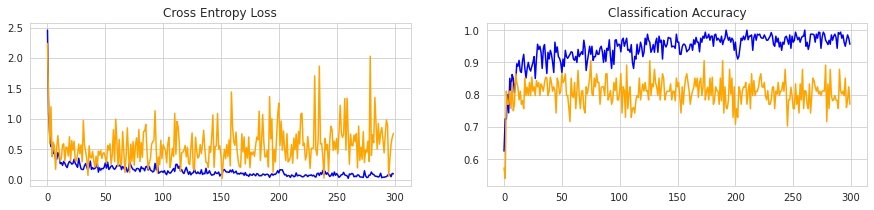

In [0]:
assess_performance(history_vgg_aug)

## Define ResNet 

In [0]:
# define Resnet50 model
xy_shape3 = 224
BatchSize3 = 64
def deep_resnet50_model():
    model = ResNet50(include_top=False, input_shape=(WIDTH, HEIGHT, 3))
    # mark loaded layers as not trainable
    nb_layers = len(model.layers)
    print('nb_layers:',nb_layers)
    for layer in model.layers[:nb_layers-5]:  #model.layers[1:20]
        layer.trainable=False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
#take the first five layers 

In [0]:
resnet_model = deep_resnet50_model()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


nb_layers: 175


In [0]:
#resnet_model.summary()

### Resent Train without data augmentation

In [0]:
histor_resnet = resnet_model.fit_generator(
    train_gen,
    epochs=300,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=validation_steps)

Epoch 1/300
5/5 [==============================] - 10s 2s/step - loss: 31.2491 - accuracy: 0.5400 - val_loss: 12.4234 - val_accuracy: 0.4333
Epoch 2/300
5/5 [==============================] - 5s 981ms/step - loss: 13.8718 - accuracy: 0.7400 - val_loss: 2.8927 - val_accuracy: 0.4000
Epoch 3/300
5/5 [==============================] - 4s 861ms/step - loss: 12.5911 - accuracy: 0.7381 - val_loss: 3.9093 - val_accuracy: 0.5667
Epoch 4/300
5/5 [==============================] - 5s 1s/step - loss: 3.9141 - accuracy: 0.7800 - val_loss: 0.8818 - val_accuracy: 0.3846
Epoch 5/300
5/5 [==============================] - 5s 1s/step - loss: 3.4507 - accuracy: 0.7600 - val_loss: 2.0955 - val_accuracy: 0.6000
Epoch 6/300
5/5 [==============================] - 6s 1s/step - loss: 3.8909 - accuracy: 0.7600 - val_loss: 8.0703 - val_accuracy: 0.5333
Epoch 7/300
5/5 [==============================] - 5s 985ms/step - loss: 4.5444 - accuracy: 0.7800 - val_loss: 2.6706 - val_accuracy: 0.5333
Epoch 8/300
5/5 [===

In [0]:
# Validate the model
resnet_model.evaluate_generator(train_gen, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[1.6653482913970947, 0.5]

In [0]:
# testing the model
resnet_model.evaluate_generator(test_gen, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.03150685876607895, 1.0]

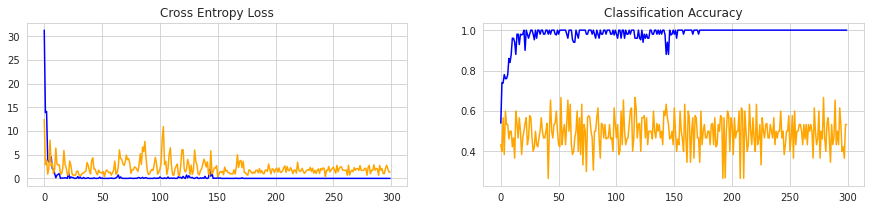

In [0]:
assess_performance(histor_resnet)

### Resnet train with data augmentation

In [0]:
histor_resnet_aug = resnet_model.fit_generator(
    train_aug,
    epochs=300,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_aug,
    validation_steps=validation_steps)

Epoch 1/300
5/5 [==============================] - 20s 4s/step - loss: 1.0594 - accuracy: 0.7388 - val_loss: 0.8986 - val_accuracy: 0.5000
Epoch 2/300
5/5 [==============================] - 26s 5s/step - loss: 0.6695 - accuracy: 0.8000 - val_loss: 1.1615 - val_accuracy: 0.4865
Epoch 3/300
5/5 [==============================] - 17s 3s/step - loss: 0.6715 - accuracy: 0.7750 - val_loss: 0.7255 - val_accuracy: 0.5000
Epoch 4/300
5/5 [==============================] - 17s 3s/step - loss: 0.3404 - accuracy: 0.8813 - val_loss: 0.8344 - val_accuracy: 0.4730
Epoch 5/300
5/5 [==============================] - 19s 4s/step - loss: 0.3771 - accuracy: 0.7463 - val_loss: 1.4852 - val_accuracy: 0.4688
Epoch 6/300
5/5 [==============================] - 26s 5s/step - loss: 0.3786 - accuracy: 0.8500 - val_loss: 0.7490 - val_accuracy: 0.5135
Epoch 7/300
5/5 [==============================] - 17s 3s/step - loss: 0.3595 - accuracy: 0.8625 - val_loss: 0.7112 - val_accuracy: 0.5270
Epoch 8/300
5/5 [==========

In [0]:
# Validate the model
resnet_model.evaluate_generator(train_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.7121330499649048, 0.53125]

In [0]:
# Validate the model
resnet_model.evaluate_generator(test_aug, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.7337164878845215, 0.5]

#### plot the accuracy 

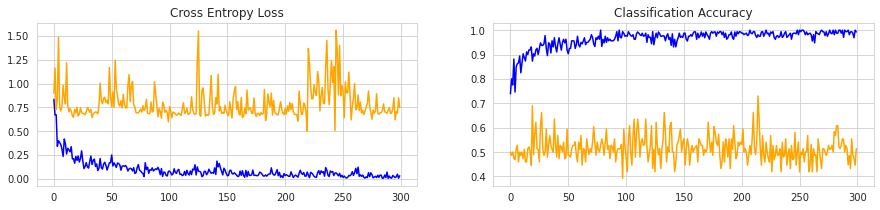

In [0]:
assess_performance(histor_resnet_aug)

## Define a model more complex

In [0]:
# define cnn model
def complex_cnn_model(isCat=False):
    model = Sequential()

    model.add(Conv2D(27, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(27, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Dropout(dropout_conv))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))      
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(13, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(13, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Dropout(dropout_conv))
    model.add(MaxPooling2D((3,3)))
    
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))      
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(13, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(13, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Dropout(dropout_conv))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(27, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))      
    model.add(Conv2D(27, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Dropout(dropout_conv))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(27, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))      
    model.add(Conv2D(27, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Conv2D(19, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(WIDTH, HEIGHT, 3)))
    model.add(Dropout(dropout_conv))
    model.add(MaxPooling2D((2,2)))
    
    # Flatten and Dense layers
    model.add(Flatten())
    # Add a Dense (Fully Connected) layer with 129 neurons with 'relu' activation with a kernel_initializer='he_uniform'
    model.add(Dense(129,activation='relu', kernel_initializer='he_uniform'))
    # Add a Dense output layer with 1 neurons with 'sigmoid' activation
    #test with softmax
    if isCat:
        model.add(Dense(2, activation='softmax'))
    else :
        model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
tb_mod_cat_train_test_acc= [[0.800000011920929, 0.8999999761581421],
 [0.800000011920929, 1.0],
 [1.0, 1.0],
 [0.800000011920929, 1.0],
 [0.800000011920929, 0.8999999761581421],
 [0.699999988079071, 1.0],
 [0.800000011920929, 0.8999999761581421],
 [0.8999999761581421, 1.0],
 [0.8999999761581421, 0.800000011920929],
 [0.699999988079071, 0.8999999761581421]]

In [121]:
mean_train_test_acc(tb_mod_cat_train_test_acc)

(0.8199999988079071, 0.9399999916553498)

In [0]:
complex_model_cat_res = complex_cnn_model(True)

In [0]:
complex_model_cat_aug = complex_cnn_model(True)

In [0]:
complex_model_bin_res = complex_cnn_model()

In [0]:
complex_model_bin_aug = complex_cnn_model()

In [0]:
complex_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 299, 299, 27)      756       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 299, 299, 27)      6588      
_________________________________________________________________
dropout_7 (Dropout)          (None, 299, 299, 27)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 27)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 149, 149, 19)      4636      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 149, 149, 19)      3268      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 149, 149, 13)     

### Train without data augmentation

In [113]:
compl_cnn_hist_cat_res = complex_model_cat_res.fit_generator(
    cat_train_res,
    epochs=500,
    steps_per_epoch=3,
    validation_data=cat_val_res,
    validation_steps=3)

Epoch 1/500
3/3 [==============================] - 7s 2s/step - loss: 0.7942 - accuracy: 0.4667 - val_loss: 0.7283 - val_accuracy: 0.3667
Epoch 2/500
3/3 [==============================] - 5s 2s/step - loss: 0.8644 - accuracy: 0.4667 - val_loss: 0.7177 - val_accuracy: 0.3333
Epoch 3/500
3/3 [==============================] - 7s 2s/step - loss: 0.7576 - accuracy: 0.3667 - val_loss: 0.7354 - val_accuracy: 0.2800
Epoch 4/500
3/3 [==============================] - 5s 2s/step - loss: 0.7803 - accuracy: 0.5000 - val_loss: 0.7134 - val_accuracy: 0.2333
Epoch 5/500
3/3 [==============================] - 5s 2s/step - loss: 0.7400 - accuracy: 0.5333 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 6/500
3/3 [==============================] - 6s 2s/step - loss: 0.7159 - accuracy: 0.5333 - val_loss: 0.6886 - val_accuracy: 0.5667
Epoch 7/500
3/3 [==============================] - 4s 1s/step - loss: 0.6829 - accuracy: 0.5667 - val_loss: 0.6969 - val_accuracy: 0.4000
Epoch 8/500
3/3 [=================

In [114]:
#Validate the model
complex_model_cat_res.evaluate_generator(cat_train_res, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.259101927280426, 0.8999999761581421]

In [115]:
#Validate the model
complex_model_cat_res.evaluate_generator(cat_test_res, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.256841778755188, 1.0]

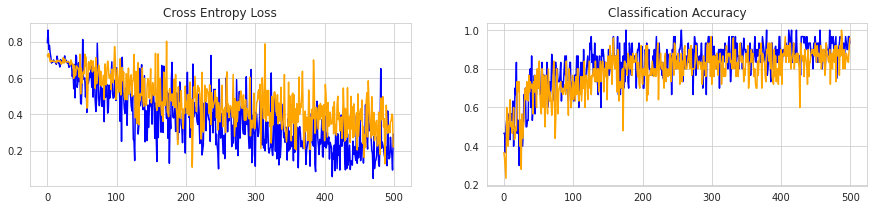

In [116]:
assess_performance(compl_cnn_hist_cat_res)

### Train with data augmentation

In [117]:
compl_cnn_hist_cat_aug = complex_model_cat_aug.fit_generator(
    cat_train_aug,
    epochs=500,
    steps_per_epoch=3,
    validation_data=cat_val_aug,
    validation_steps=3)

Epoch 1/500
3/3 [==============================] - 7s 2s/step - loss: 1.5953 - accuracy: 0.4333 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 2/500
3/3 [==============================] - 7s 2s/step - loss: 0.7261 - accuracy: 0.5333 - val_loss: 0.6951 - val_accuracy: 0.5667
Epoch 3/500
3/3 [==============================] - 7s 2s/step - loss: 0.8337 - accuracy: 0.4333 - val_loss: 0.6915 - val_accuracy: 0.6800
Epoch 4/500
3/3 [==============================] - 7s 2s/step - loss: 0.7336 - accuracy: 0.4667 - val_loss: 0.7106 - val_accuracy: 0.4333
Epoch 5/500
3/3 [==============================] - 6s 2s/step - loss: 0.6239 - accuracy: 0.6667 - val_loss: 0.6524 - val_accuracy: 0.6000
Epoch 6/500
3/3 [==============================] - 6s 2s/step - loss: 0.7333 - accuracy: 0.5333 - val_loss: 0.6741 - val_accuracy: 0.5333
Epoch 7/500
3/3 [==============================] - 5s 2s/step - loss: 0.6992 - accuracy: 0.5000 - val_loss: 0.6956 - val_accuracy: 0.3600
Epoch 8/500
3/3 [=================

In [118]:
#Validate the model
complex_model_cat_aug.evaluate_generator(cat_train_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.36911311745643616, 0.8999999761581421]

In [0]:
#with train aug = train accuracy 0.5 , Test accuracy = 0.48

In [122]:
#Testing the model
complex_model_cat_aug.evaluate_generator(cat_test_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.711702823638916, 0.4000000059604645]

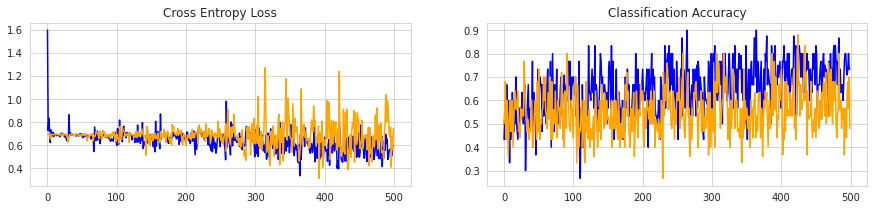

In [124]:
assess_performance(compl_cnn_hist_cat_aug)

### Complex model train on binary data

In [125]:
compl_cnn_hist_bin_res = complex_model_bin_res.fit_generator(
    bin_train_res,
    epochs=500,
    steps_per_epoch=3,
    validation_data=bin_val_res,
    validation_steps=3)

Epoch 1/500
3/3 [==============================] - 6s 2s/step - loss: 1.4740 - accuracy: 0.5000 - val_loss: 0.6613 - val_accuracy: 0.5333
Epoch 2/500
3/3 [==============================] - 6s 2s/step - loss: 0.7743 - accuracy: 0.5333 - val_loss: 0.6914 - val_accuracy: 0.5333
Epoch 3/500
3/3 [==============================] - 6s 2s/step - loss: 0.6737 - accuracy: 0.6667 - val_loss: 0.6778 - val_accuracy: 0.6400
Epoch 4/500
3/3 [==============================] - 6s 2s/step - loss: 0.6286 - accuracy: 0.6667 - val_loss: 0.6600 - val_accuracy: 0.4667
Epoch 5/500
3/3 [==============================] - 4s 1s/step - loss: 0.8471 - accuracy: 0.4000 - val_loss: 0.7013 - val_accuracy: 0.3600
Epoch 6/500
3/3 [==============================] - 6s 2s/step - loss: 0.7021 - accuracy: 0.4667 - val_loss: 0.7004 - val_accuracy: 0.5333
Epoch 7/500
3/3 [==============================] - 5s 2s/step - loss: 0.6925 - accuracy: 0.4667 - val_loss: 0.6878 - val_accuracy: 0.4800
Epoch 8/500
3/3 [=================

In [127]:
#Validate the model
complex_model_bin_res.evaluate_generator(bin_train_res, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.3352309763431549, 0.8999999761581421]

In [128]:
#Testing the model
complex_model_bin_res.evaluate_generator(bin_test_res, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.35757702589035034, 1.0]

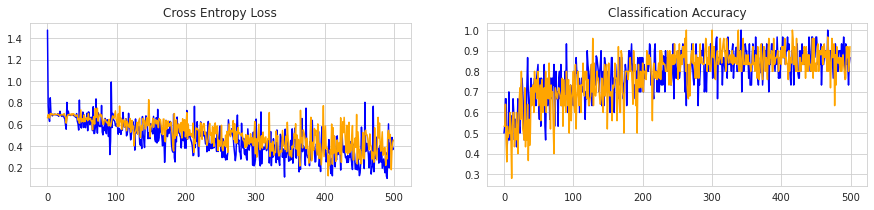

In [129]:
assess_performance(compl_cnn_hist_bin_res)

### Train with augmentation

In [130]:
compl_cnn_hist_bin_aug = complex_model_bin_aug.fit_generator(
    bin_train_aug,
    epochs=500,
    steps_per_epoch=3,
    validation_data=bin_val_aug,
    validation_steps=3)

Epoch 1/500
3/3 [==============================] - 7s 2s/step - loss: 1.4073 - accuracy: 0.4667 - val_loss: 0.7387 - val_accuracy: 0.3667
Epoch 2/500
3/3 [==============================] - 6s 2s/step - loss: 1.0933 - accuracy: 0.6250 - val_loss: 0.6798 - val_accuracy: 0.6000
Epoch 3/500
3/3 [==============================] - 8s 3s/step - loss: 0.7284 - accuracy: 0.4000 - val_loss: 0.6890 - val_accuracy: 0.5200
Epoch 4/500
3/3 [==============================] - 7s 2s/step - loss: 0.6817 - accuracy: 0.6000 - val_loss: 0.6934 - val_accuracy: 0.5333
Epoch 5/500
3/3 [==============================] - 6s 2s/step - loss: 0.7209 - accuracy: 0.4333 - val_loss: 0.6983 - val_accuracy: 0.4400
Epoch 6/500
3/3 [==============================] - 6s 2s/step - loss: 0.7026 - accuracy: 0.4667 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 7/500
3/3 [==============================] - 6s 2s/step - loss: 0.7102 - accuracy: 0.4667 - val_loss: 0.6743 - val_accuracy: 0.4800
Epoch 8/500
3/3 [=================

In [131]:
#Validate the model
complex_model_bin_aug.evaluate_generator(bin_train_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.6097246408462524, 0.699999988079071]

In [132]:
#Validate the model
complex_model_bin_aug.evaluate_generator(bin_test_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.9959676861763, 0.4000000059604645]

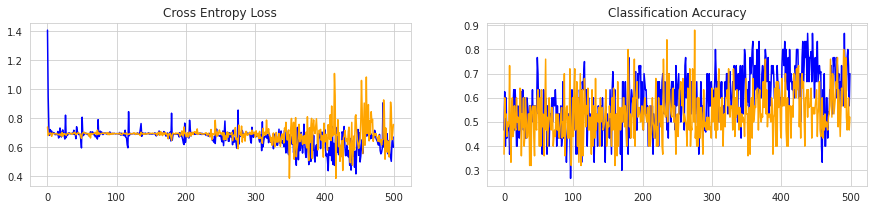

In [133]:
assess_performance(compl_cnn_hist_bin_aug)

## Save the model 

In [0]:
MODEL_FILE = 'cnn.model'

In [0]:
cnn.save(MODEL_FILE)

NameError: ignored

## Prediction

In [0]:

def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]
  
def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("ntb", "tb")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [0]:
pwd

'/Users/macbookpro/Desktop/data/train'

In [0]:
# importing packages
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
model = load_model(MODEL_FILE)

In [0]:
# testing the model
model.evaluate_generator(cat_test_res,
                         steps=1,
                         max_queue_size=10,
                         workers=1,
                         use_multiprocessing=False,
                         verbose=0
                        )

[0.35331815481185913, 0.8500000238418579]

## Visualize a test case

In [0]:
# visualizing a test case
img = image.load_img('test/tb/CHNCXR_0377_1.png', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)

In [0]:
plot_preds(np.asarray(img), preds)
preds

## Complex Model

In [0]:
preds = predict(complex_model, img)

In [0]:
plot_preds(np.asarray(img), preds)
preds

## The other model

In [0]:
preds = predict(cnn_2, img)

In [0]:
plot_preds(np.asarray(img), preds)
preds

## Attention model with VGG

In [0]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
from keras.layers import BatchNormalization

In [0]:
def attention_model(model):

    base_pretrained_model = model
    base_pretrained_model.trainable = False
    pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
    pt_features = base_pretrained_model(in_lay)
    

    bn_features = BatchNormalization()(pt_features)

    # here we do an attention mechanism to turn pixels in the GAP on an off

    attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
    attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = Conv2D(1, 
                        kernel_size = (1,1), 
                        padding = 'valid', 
                        activation = 'sigmoid')(attn_layer)
    # fan it out to all of the channels
    up_c2_w = np.ones((1, 1, 1, pt_depth))
    up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
                   activation = 'linear', use_bias = False, weights = [up_c2_w])
    up_c2.trainable = False
    attn_layer = up_c2(attn_layer)

    mask_features = multiply([attn_layer, bn_features])
    gap_features = GlobalAveragePooling2D()(mask_features)
    gap_mask = GlobalAveragePooling2D()(attn_layer)
    # to account for missing values from the attention model
    gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
    gap_dr = Dropout(0.25)(gap)
    dr_steps = Dropout(0.25)(Dense(128, activation = 'elu')(gap_dr))
    out_layer = Dense(2, activation = 'softmax')(dr_steps)
    tb_at_model = Model(inputs = [in_lay], outputs = [out_layer])

    tb_at_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                               metrics = ['accuracy'])
    
    return tb_at_model

In [0]:
at_model = attention_model(cnn_model)

In [0]:
def attention_vgg16(isCat=False):
    in_lay = Input((WIDTH, HEIGHT, 3))
    base_pretrained_model = VGG16(input_shape =  (WIDTH, HEIGHT, 3), 
                                  include_top = False, weights = 'imagenet')
    
    base_pretrained_model.trainable = False
    pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
    pt_features = base_pretrained_model(in_lay)


    bn_features = BatchNormalization()(pt_features)

    # here we do an attention mechanism to turn pixels in the GAP on an off

    attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
    attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = Conv2D(1, 
                        kernel_size = (1,1), 
                        padding = 'valid', 
                        activation = 'sigmoid')(attn_layer)
    # fan it out to all of the channels
    up_c2_w = np.ones((1, 1, 1, pt_depth))
    up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
                   activation = 'linear', use_bias = False, weights = [up_c2_w])
    up_c2.trainable = False
    attn_layer = up_c2(attn_layer)

    mask_features = multiply([attn_layer, bn_features])
    gap_features = GlobalAveragePooling2D()(mask_features)
    gap_mask = GlobalAveragePooling2D()(attn_layer)
    # to account for missing values from the attention model
    gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
    gap_dr = Dropout(0.25)(gap)
    dr_steps = Dropout(0.25)(Dense(128, activation = 'elu')(gap_dr))
    if isCat:
      out_layer = Dense(2, activation = 'sigmoid')(dr_steps)
    else :
      out_layer = Dense(1, activation = 'sigmoid')(dr_steps)

    tb_at_model = Model(inputs = [in_lay], outputs = [out_layer])

    tb_at_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                               metrics = ['accuracy'])
    return tb_at_model

In [136]:
tb_at_vgg16 = attention_vgg16()

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
tb_at_vgg16_cat = attention_vgg16(True)

In [0]:
tb_at_vgg16_cat_res = attention_vgg16(True)

### Train on rescale data

In [0]:
vgg_at_history_aug_cat_res = tb_at_vgg16_cat_res.fit_generator(
        cat_train_res,
        epochs=500,
        steps_per_epoch=steps_per_epoch,
        validation_data=cat_val_res,
        validation_steps=validation_steps)

Epoch 1/500
Epoch 1/500
5/5 [==============================] - 9s 2s/step - loss: 0.6697 - accuracy: 0.5500 - val_loss: 0.6531 - val_accuracy: 0.5667
Epoch 2/500
Epoch 2/500
5/5 [==============================] - 6s 1s/step - loss: 0.6728 - accuracy: 0.6300 - val_loss: 0.6313 - val_accuracy: 0.6000
Epoch 3/500
Epoch 3/500
5/5 [==============================] - 9s 2s/step - loss: 0.6249 - accuracy: 0.6700 - val_loss: 0.6310 - val_accuracy: 0.4800
Epoch 4/500
5/5 [==============================] - 6s 1s/step - loss: 0.5289 - accuracy: 0.7900 - val_loss: 0.6111 - val_accuracy: 0.6667
Epoch 5/500
Epoch 5/500
5/5 [==============================] - 9s 2s/step - loss: 0.5350 - accuracy: 0.7500 - val_loss: 0.6833 - val_accuracy: 0.4400
Epoch 6/500
5/5 [==============================] - 6s 1s/step - loss: 0.4855 - accuracy: 0.7900 - val_loss: 0.6730 - val_accuracy: 0.5167
Epoch 7/500
Epoch 7/500
5/5 [==============================] - 7s 1s/step - loss: 0.4727 - accuracy: 0.7800 - val_loss: 0.68

In [2]:
vgg_at_history_aug_cat_res =tb_at_vgg16_cat_re

NameError: ignored

#### Train with augmentation data

In [138]:
vgg_at_history_aug_cat = tb_at_vgg16_cat.fit_generator(
        cat_train_aug,
        epochs=500,
        steps_per_epoch=steps_per_epoch,
        validation_data=cat_val_aug,
        validation_steps=validation_steps)

Epoch 1/500
5/5 [==============================] - 10s 2s/step - loss: 0.6937 - accuracy: 0.5455 - val_loss: 0.7613 - val_accuracy: 0.5000
Epoch 2/500
5/5 [==============================] - 9s 2s/step - loss: 0.6241 - accuracy: 0.6900 - val_loss: 0.8084 - val_accuracy: 0.5000
Epoch 3/500
5/5 [==============================] - 11s 2s/step - loss: 0.5834 - accuracy: 0.7000 - val_loss: 0.7393 - val_accuracy: 0.5400
Epoch 4/500
5/5 [==============================] - 6s 1s/step - loss: 0.6586 - accuracy: 0.7000 - val_loss: 0.6280 - val_accuracy: 0.6667
Epoch 5/500
5/5 [==============================] - 9s 2s/step - loss: 0.6117 - accuracy: 0.6700 - val_loss: 0.6050 - val_accuracy: 0.6200
Epoch 6/500
5/5 [==============================] - 8s 2s/step - loss: 0.4405 - accuracy: 0.8400 - val_loss: 0.7816 - val_accuracy: 0.5667
Epoch 7/500
5/5 [==============================] - 8s 2s/step - loss: 0.5503 - accuracy: 0.7000 - val_loss: 0.4820 - val_accuracy: 0.6400
Epoch 8/500
5/5 [===============

In [139]:
tb_at_vgg16_cat.evaluate_generator(cat_train_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.20352010428905487, 0.8999999761581421]

In [140]:
tb_at_vgg16_cat.evaluate_generator(cat_test_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.0780339390039444, 1.0]

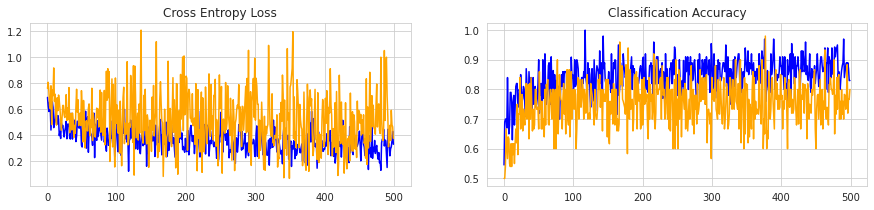

In [141]:
assess_performance(vgg_at_history_aug_cat)

### train on rescale data

In [142]:
#show the summary
tb_at_vgg16.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 9, 9, 512)    14714688    input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 9, 9, 512)    2048        vgg16[1][0]                      
__________________________________________________________________________________________________
conv2d_171 (Conv2D)             (None, 9, 9, 64)     32832       batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [143]:
vgg_at_history_bin_aug = tb_at_vgg16.fit_generator(
        bin_test_aug,
        epochs=500,
        steps_per_epoch=3,
        validation_data=bin_val_aug,
        validation_steps=validation_steps)

Epoch 1/500
3/3 [==============================] - 6s 2s/step - loss: 0.7644 - accuracy: 0.4000 - val_loss: 0.7424 - val_accuracy: 0.5667
Epoch 2/500
3/3 [==============================] - 6s 2s/step - loss: 0.6624 - accuracy: 0.6000 - val_loss: 0.8842 - val_accuracy: 0.4000
Epoch 3/500
3/3 [==============================] - 5s 2s/step - loss: 0.8461 - accuracy: 0.2667 - val_loss: 0.8956 - val_accuracy: 0.5200
Epoch 4/500
3/3 [==============================] - 6s 2s/step - loss: 0.6779 - accuracy: 0.6190 - val_loss: 0.7849 - val_accuracy: 0.5333
Epoch 5/500
3/3 [==============================] - 5s 2s/step - loss: 0.7364 - accuracy: 0.5000 - val_loss: 0.6517 - val_accuracy: 0.5600
Epoch 6/500
3/3 [==============================] - 5s 2s/step - loss: 0.7317 - accuracy: 0.4333 - val_loss: 0.7436 - val_accuracy: 0.5000
Epoch 7/500
3/3 [==============================] - 5s 2s/step - loss: 0.6709 - accuracy: 0.6000 - val_loss: 0.8364 - val_accuracy: 0.4800
Epoch 8/500
3/3 [=================

In [0]:
at_history = tb_at_vgg16.history

In [145]:
tb_at_vgg16.evaluate_generator(bin_train_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[1.3144055604934692, 0.800000011920929]

In [146]:
tb_at_vgg16.evaluate_generator(bin_test_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.056928686797618866, 1.0]

In [0]:
#the vgg attention train on the gen datat

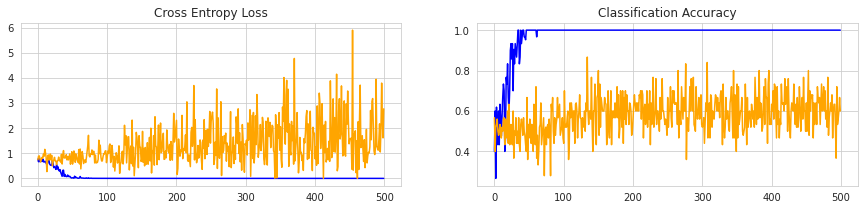

In [147]:
assess_performance(vgg_at_history_bin_aug)

#### Train with data augmentation

In [0]:
vgg_at_history_aug = tb_at_vgg16.fit_generator(
        train_aug,
        epochs=300,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_aug,
        validation_steps=validation_steps)

Epoch 1/300
5/5 [==============================] - 24s 5s/step - loss: 0.7189 - accuracy: 0.8562 - val_loss: 0.8271 - val_accuracy: 0.7708
Epoch 2/300
5/5 [==============================] - 22s 4s/step - loss: 0.5978 - accuracy: 0.8731 - val_loss: 0.9252 - val_accuracy: 0.8243
Epoch 3/300
5/5 [==============================] - 17s 3s/step - loss: 0.6109 - accuracy: 0.7875 - val_loss: 0.7659 - val_accuracy: 0.8108
Epoch 4/300
5/5 [==============================] - 17s 3s/step - loss: 0.4395 - accuracy: 0.8500 - val_loss: 0.4353 - val_accuracy: 0.7973
Epoch 5/300
5/5 [==============================] - 22s 4s/step - loss: 0.3586 - accuracy: 0.8687 - val_loss: 0.3102 - val_accuracy: 0.8125
Epoch 6/300
5/5 [==============================] - 23s 5s/step - loss: 0.3277 - accuracy: 0.8657 - val_loss: 0.4178 - val_accuracy: 0.7973
Epoch 7/300
5/5 [==============================] - 14s 3s/step - loss: 0.3397 - accuracy: 0.8731 - val_loss: 0.4401 - val_accuracy: 0.8243
Epoch 8/300
5/5 [==========

In [0]:
tb_at_vgg16.evaluate_generator(train_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.09792806208133698, 0.9375]

In [0]:
tb_at_vgg16.evaluate_generator(test_aug, 
                                steps=1,  
                                max_queue_size=10,
                                workers=1, 
                                use_multiprocessing=False,
                                verbose=0
                               )

[0.46295595169067383, 0.90625]

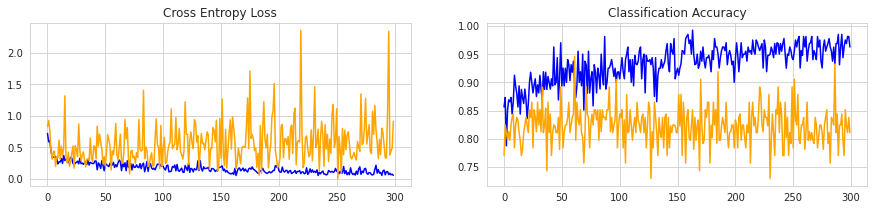

In [0]:
assess_performance(vgg_at_history_aug)

In [0]:
preds = predict(tb_at_vgg16, img)

In [0]:
plot_preds(np.asarray(img), preds)
preds

In [0]:
cnn

In [0]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
from tensorflow.keras.models importInput
from keras.layers import BatchNormalization

In [0]:
def attention_cnn_model():
    in_lay = Input((WIDTH, HEIGHT,1))
    base_pretrained_model = cnn
    
    base_pretrained_model.trainable = False
    pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
    print(pt_depth)
    pt_features = base_pretrained_model(in_lay)


    bn_features = BatchNormalization()(pt_features)
    
    print(bn_features)

    # here we do an attention mechanism to turn pixels in the GAP on an off

    attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
    attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = Conv2D(1, 
                        kernel_size = (1,1), 
                        padding = 'same', 
                        activation = 'sigmoid')(attn_layer)
    # fan it out to all of the channels
    up_c2_w = np.ones((1, 1, 1, pt_depth))
    up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
                   activation = 'linear', use_bias = False, weights = [up_c2_w])
    up_c2.trainable = False
    attn_layer = up_c2(attn_layer)

    mask_features = multiply([attn_layer, bn_features])
    gap_features = GlobalAveragePooling2D()(mask_features)
    gap_mask = GlobalAveragePooling2D()(attn_layer)
    # to account for missing values from the attention model
    gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
    gap_dr = Dropout(0.25)(gap)
    dr_steps = Dropout(0.25)(Dense(128, activation = 'elu')(gap_dr))
    out_layer = Dense(2, activation = 'softmax')(dr_steps)
    tb_at_model = Model(inputs = [in_lay], outputs = [out_layer])

    tb_at_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                               metrics = ['accuracy'])
    return tb_at_model

In [0]:
at_cnn_model = attention_cnn_model()